In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import pandas_datareader
import datetime

In [ ]:
import pandas_datareader.data as web

In [ ]:
tesla = pd.read_csv("Tesla_Stock.csv")

In [ ]:
tesla.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,28.94,29.50,27.65,28.08,928052
1,2012-01-04,28.21,28.67,27.50,27.71,630036
2,2012-01-05,27.76,27.93,26.85,27.12,1005432
3,2012-01-06,27.20,27.79,26.41,26.89,687081
4,2012-01-09,27.00,27.49,26.12,27.25,896951


In [ ]:
ford = pd.read_csv("Ford_Stock.csv")

In [ ]:
gm = pd.read_csv("GM_Stock.csv")

In [ ]:
ford.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,11.00,11.25,10.99,11.13,45709811
1,2012-01-04,11.15,11.53,11.07,11.30,79725188
2,2012-01-05,11.33,11.63,11.24,11.59,67877467
3,2012-01-06,11.74,11.80,11.52,11.71,59840605
4,2012-01-09,11.83,11.95,11.70,11.80,53981467


In [ ]:
gm.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,20.83,21.18,20.75,21.05,9321420
1,2012-01-04,21.05,21.37,20.75,21.15,7856752
2,2012-01-05,21.10,22.29,20.96,22.17,17884040
3,2012-01-06,22.26,23.03,22.24,22.92,18234608
4,2012-01-09,23.20,23.43,22.70,22.84,12091714


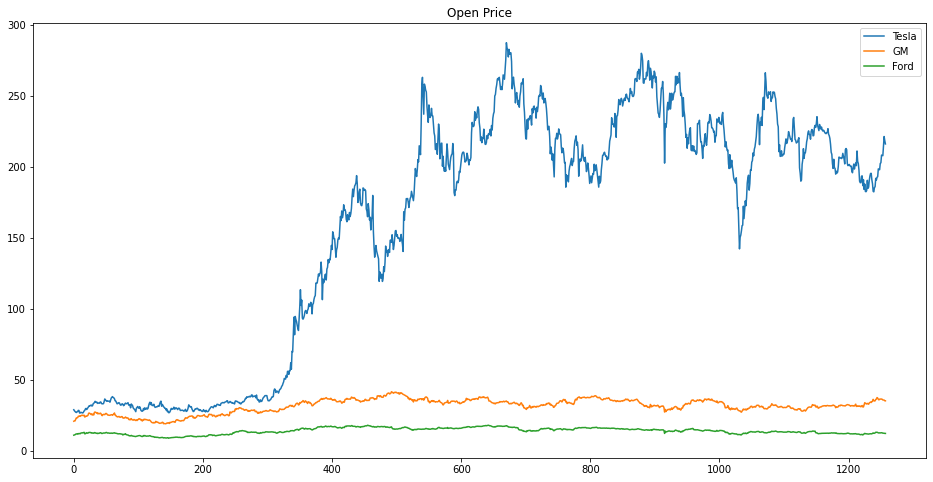

In [ ]:
tesla['Open'].plot(label='Tesla',figsize=(16,8),title='Open Price')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.legend()

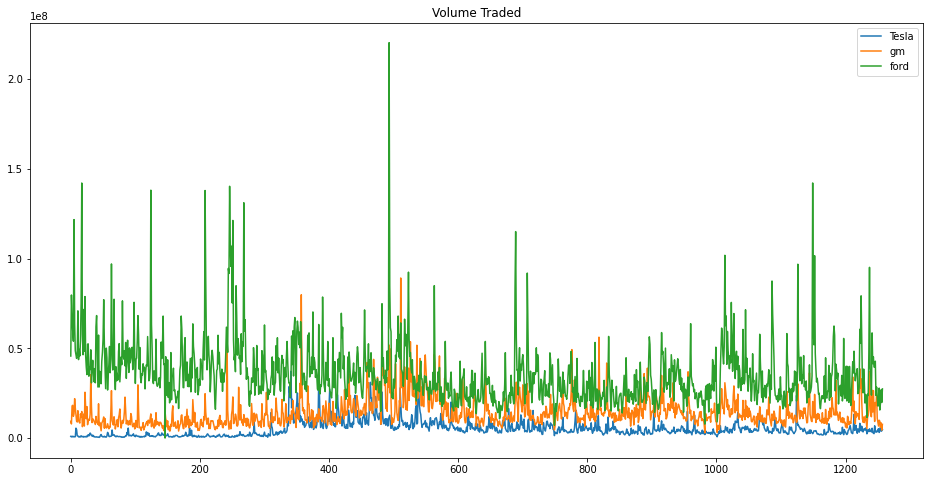

In [ ]:
tesla['Volume'].plot(label='Tesla',figsize=(16,8),title='Volume Traded')
gm['Volume'].plot(label='gm')
ford['Volume'].plot(label='ford')
plt.legend()

In [ ]:
ford['Volume'].argmax()

493

In [ ]:
tesla['Total Traded'] = tesla['Open']*tesla['Volume']
ford['Total Traded'] = ford['Open']*ford['Volume']
gm['Total Traded'] = gm['Open']*gm['Volume']

Text(0, 0.5, 'Total Traded')

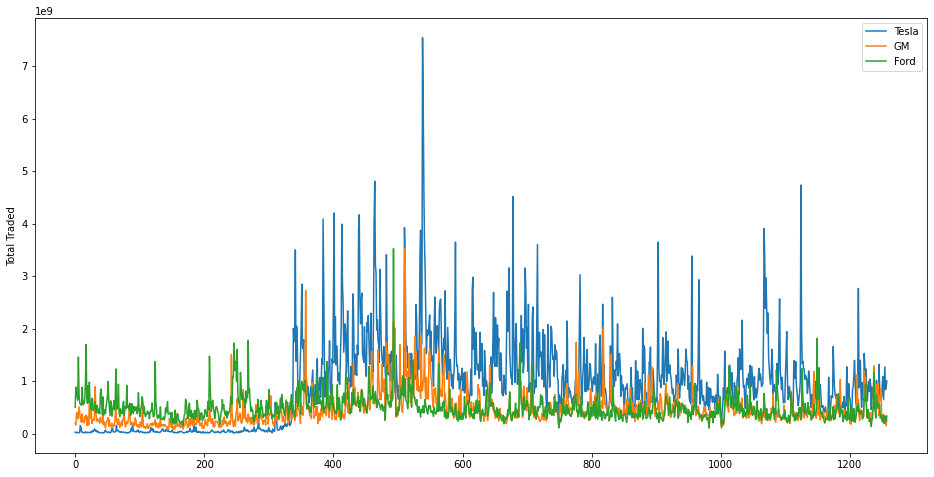

In [ ]:
tesla['Total Traded'].plot(label='Tesla',figsize=(16,8))
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label='Ford')
plt.legend()
plt.ylabel('Total Traded')

In [ ]:
tesla['Total Traded'].argmax()

538

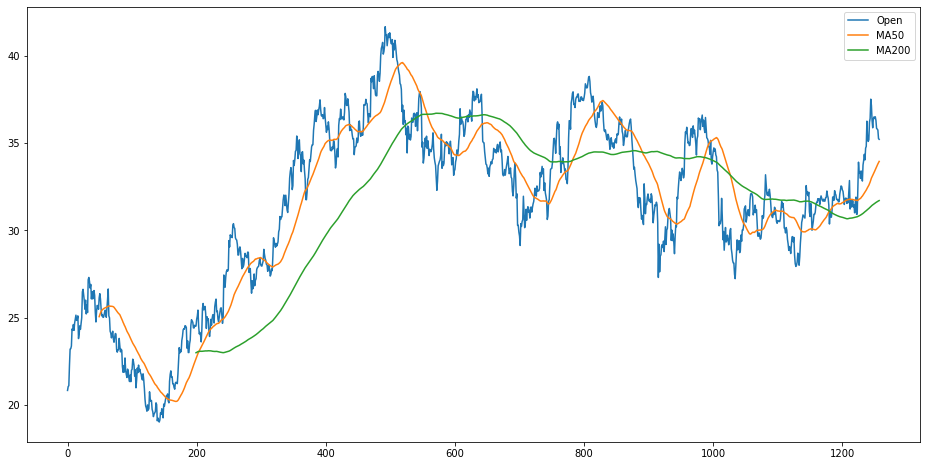

In [ ]:
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()
gm[['Open','MA50','MA200']].plot(label='gm',figsize=(16,8))

In [ ]:
from pandas.plotting import scatter_matrix

In [ ]:
car_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis=1)

In [ ]:
car_comp.columns = ['Tesla Open','GM Open','Ford Open']

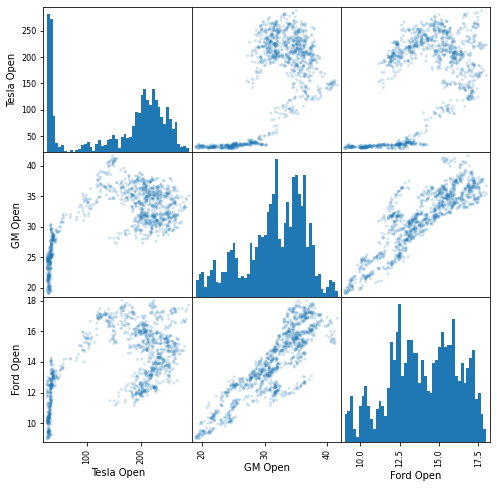

In [ ]:
scatter_matrix(car_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

In [ ]:
tesla['returns'] = (tesla['Close'] / tesla['Close'].shift(1) ) - 1

In [ ]:
tesla.head()

,Date,Open,High,Low,Close,Volume,Total Traded,returns
0,2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN
1,2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177
2,2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292
3,2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481
4,2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388


In [ ]:
tesla['returns'] = tesla['Close'].pct_change(1)

In [ ]:
ford['returns'] = ford['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)

In [ ]:
ford.head()

,Date,Open,High,Low,Close,Volume,Total Traded,returns
0,2012-01-03,11.00,11.25,10.99,11.13,45709811,5.028079e+08,NaN
1,2012-01-04,11.15,11.53,11.07,11.30,79725188,8.889358e+08,0.015274
2,2012-01-05,11.33,11.63,11.24,11.59,67877467,7.690517e+08,0.025664
3,2012-01-06,11.74,11.80,11.52,11.71,59840605,7.025287e+08,0.010354
4,2012-01-09,11.83,11.95,11.70,11.80,53981467,6.386008e+08,0.007686


In [ ]:
gm.head()

,Date,Open,High,Low,Close,Volume,Total Traded,MA50,MA200,returns
0,2012-01-03,20.83,21.18,20.75,21.05,9321420,1.941652e+08,NaN,NaN,NaN
1,2012-01-04,21.05,21.37,20.75,21.15,7856752,1.653846e+08,NaN,NaN,0.004751
2,2012-01-05,21.10,22.29,20.96,22.17,17884040,3.773532e+08,NaN,NaN,0.048227
3,2012-01-06,22.26,23.03,22.24,22.92,18234608,4.059024e+08,NaN,NaN,0.033829
4,2012-01-09,23.20,23.43,22.70,22.84,12091714,2.805278e+08,NaN,NaN,-0.003490


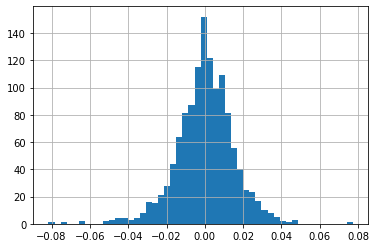

In [ ]:
ford['returns'].hist(bins=50)

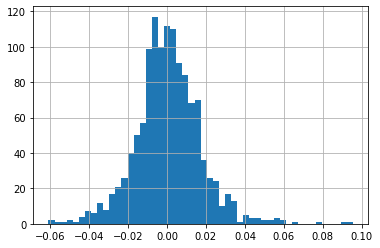

In [ ]:
gm['returns'].hist(bins=50)

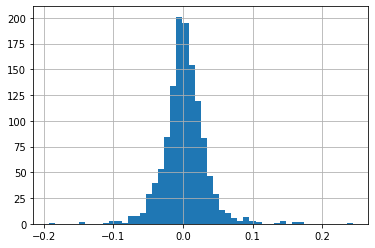

In [ ]:
tesla['returns'].hist(bins=50)

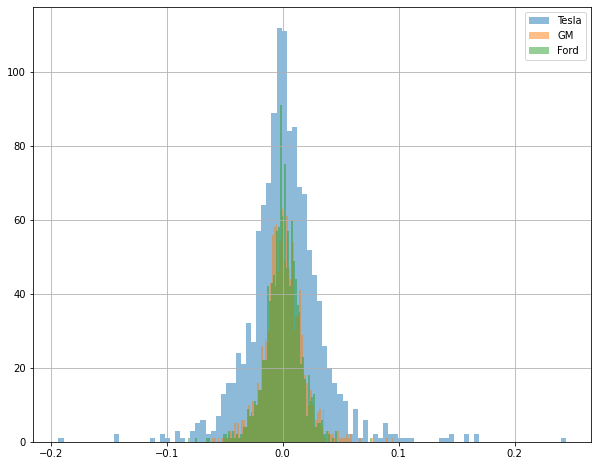

In [ ]:
tesla['returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=0.5)
gm['returns'].hist(bins=100,label='GM',alpha=0.5)
ford['returns'].hist(bins=100,label='Ford',alpha=0.5)
plt.legend()

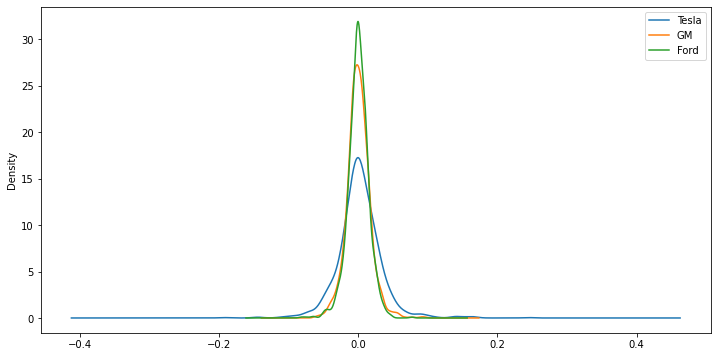

In [ ]:
tesla['returns'].plot(kind='kde',label='Tesla',figsize=(12,6))
gm['returns'].plot(kind='kde',label='GM')
ford['returns'].plot(kind='kde',label='Ford')
plt.legend()

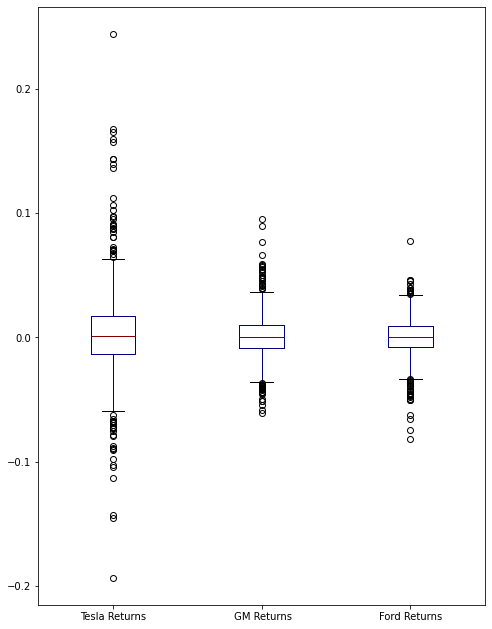

In [ ]:
box_df = pd.concat([tesla['returns'],gm['returns'],ford['returns']],axis=1)
box_df.columns = ['Tesla Returns',' GM Returns','Ford Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')

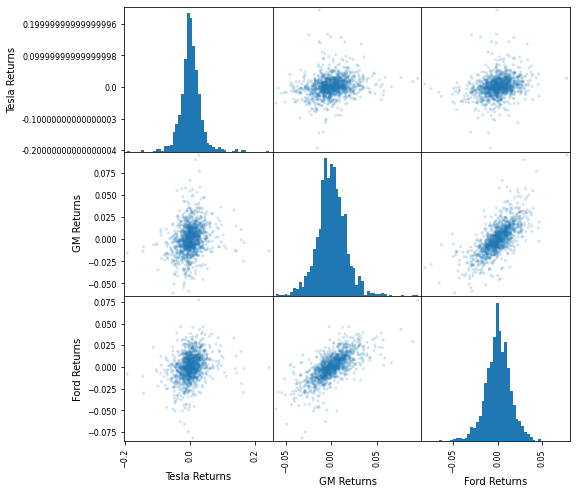

In [ ]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

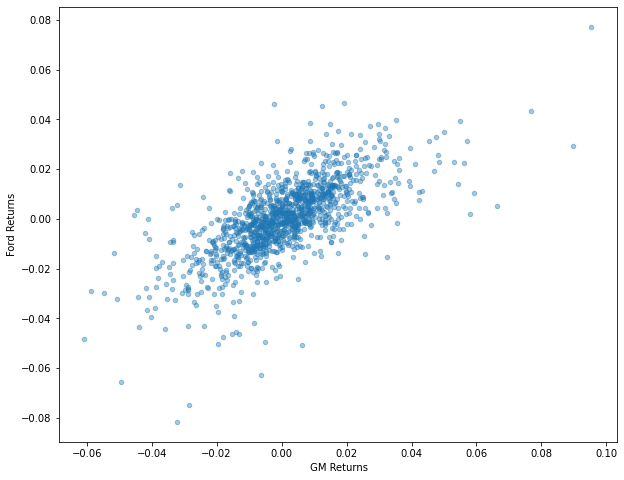

In [ ]:
box_df.plot(kind='scatter',x=' GM Returns',y='Ford Returns',alpha=0.4,figsize=(10,8))

In [ ]:
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()

In [ ]:
tesla.head()

,Date,Open,High,Low,Close,Volume,Total Traded,returns,Cumulative Return
0,2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN,NaN
1,2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177,0.986823
2,2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292,0.965812
3,2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481,0.957621
4,2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388,0.970442


In [ ]:
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()

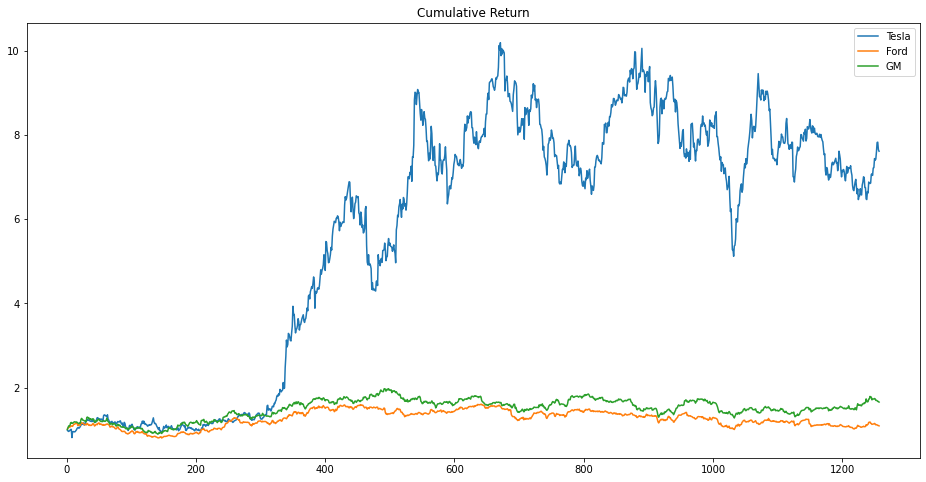

In [ ]:
tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8),title='Cumulative Return')
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')
plt.legend()